<a href="https://colab.research.google.com/github/KickAssDani/ProgramacionAvanzadaUned/blob/master/Anova_Uned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Libro: Experimentation in Software Enginnering
#Capítulo: 10 - Analysis and Interpretation
#Tema: Anova de un factor con más de tres tratamientos
#Sección: 10.3.10 
#Dr. Abel Méndez Porras

https://www.descubrimiclase.com/

mendez.abel@gmail.com

# Información del Estudiante
Nombre completo: Jorge Eduardo Chaves Esquivel

Email: jechaves@uned

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problema


Se han medido los tamaños de los módulos en tres programas diferentes.


La hipótesis del investigador es que la media del tamaño de los módulos no es igual en los tres programas.

# Crear datos

In [ ]:
import pandas as pd
import numpy as np 
# Declaracion de data frame con algunos datos faltantes
# NaN = Not a Number
df = pd.DataFrame({'Programa1':[221,159,191,194,156,238,220,197,197,194,np.nan,np.nan],
                  'Programa2':[173,171,168,286,206,140,226,248,189,208,213,np.nan],
                  'Programa3':[234,188,181,207,266,153,190,195,181,238,191,260]})
df

,Programa1,Programa2,Programa3
0,221.0,173.0,234
1,159.0,171.0,188
2,191.0,168.0,181
3,194.0,286.0,207
4,156.0,206.0,266
5,238.0,140.0,153
6,220.0,226.0,190
7,197.0,248.0,195
8,197.0,189.0,181
9,194.0,208.0,238


# Gráficar datos

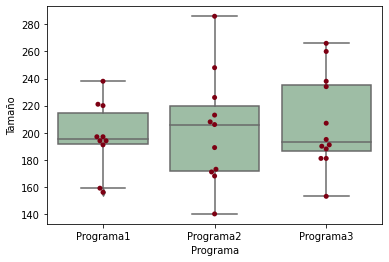

In [ ]:
import pandas as pd
# Ajustar el conjuto de datos  para el paquete statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Programa1', 'Programa2', 'Programa3'])
# Replanzar el nombre de las columnas
df_melt.columns = ['index', 'Programa', 'Tamaño']

#Genere un diagrama de caja para ver la distribución de datos por tratamientos. 
#En el diagrama de caja, se puede detectar fácilmente las diferencias entre los diferentes tratamientos.
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Programa', y='Tamaño', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="Programa", y="Tamaño", data=df_melt, color='#7d0013')
plt.show()

# Resumen de los datos

In [ ]:
!pip install  researchpy
import researchpy as rp

print(rp.summary_cont(df['Programa1']))
print(rp.summary_cont(df['Programa2']))
print(rp.summary_cont(df['Programa3']))



    Variable     N   Mean       SD      SE  95% Conf.  Interval
0  Programa1  10.0  196.7  25.7425  8.1405   178.2849  215.1151


    Variable     N      Mean       SD       SE  95% Conf.  Interval
0  Programa2  11.0  202.5455  41.0959  12.3909   174.9369  230.1541


    Variable     N   Mean       SD       SE  95% Conf.  Interval
0  Programa3  12.0  207.0  34.7694  10.0371   184.9086  229.0914


# Pruebas de normalidad estadística

La prueba de normalidad es el primer paso en el análisis de datos. 

Si los datos se ajustan a la normalidad determina el uso posterior de diferentes métodos de análisis y predicción.

## Prueba de Shapiro-Wilk


In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
p1 = df.Programa1
p1 = p1[:-2] #Quitar los NaNs
stat, p = shapiro(p1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('La muestra parece gaussiana (no se rechaza H0)')
else:
  print('La muestra no parece gaussiana (se rechaza H0)')

Statistics=0.922, p=0.372
La muestra parece gaussiana (no se rechaza H0)


In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
p2 = df.Programa2
p2 = p2[:-1] #Quitar los NaNs
stat, p = shapiro(p2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('La muestra parece gaussiana (no se rechaza H0)')
else:
  print('La muestra no parece gaussiana (se rechaza H0)')

Statistics=0.967, p=0.851
La muestra parece gaussiana (no se rechaza H0)


In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df.Programa3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('La muestra parece gaussiana (no se rechaza H0)')
else:
  print('La muestra no parece gaussiana (se rechaza H0)')

Statistics=0.918, p=0.272
La muestra parece gaussiana (no se rechaza H0)


Siendo la hipótesis nula que la población está distribuida normalmente, si el p-valor es menor a alfa (nivel de significancia) entonces la hipótesis nula es rechazada (se concluye que los datos no vienen de una distribución normal). Si el p-valor es mayor a alfa, se concluye que no se puede rechazar dicha hipótesis.

# Prueba de homogeneidad de varianza

La varianza permite ver el grado de desviación de un conjunto de datos de su promedio. 
La prueba de homogeneidad de varianza se utiliza para probar si hay una diferencia entre la desviación de dos o más conjuntos de datos de su media. 

## Prueba de Levene

In [ ]:
import scipy.stats as stats
p1 = df.Programa1
p1 = p1[:-2] #Quitar los NaNs
p2 = df.Programa2
p2 = p2[:-1] #Quitar los NaNs
p3 = df.Programa3

stats.levene(p1, p2, p3)

LeveneResult(statistic=0.8184319809608998, pvalue=0.4507309858459929)

Valor devuelto p-valor = 0.4507309858459929, que es mayor que el nivel de significancia especificado (se supone que es 5%), y los tres conjuntos de datos se consideran homogéneos en varianza.

# Anova 

Anova de un solo un factor.

In [ ]:
import scipy.stats as stats
import pandas as pd
# Ajustar el conjuto de datos  para el paquete statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Programa1', 'Programa2', 'Programa3'])
# Replanzar el nombre de las columnas
df_melt.columns = ['index', 'Programa', 'Tamaño']

# Obtener tabla ANOVA como una salida de R
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Tamaño ~ C(Programa)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Programa),579.051515,2.0,0.240265,0.787918
Residual,36150.827273,30.0,NaN,NaN


*   H<sub>0</sub>: El tamaño medio del módulo es el mismo en los tres programas.
*   H<sub>1</sub>: El tamaño medio del módulo **no** es el mismo en los tres programas.

De la tabla Critica de valores para dos colas, se puede ver que F<sub>0.025, 2, 30</sub> = 4:18. Dado que F<sub>0</sub> es igual a 0.240265, entonces F<sub>0</sub> < F<sub>0.025, 2, 30</sub>, entonces es imposible rechazar la hipótesis nula al nivel 0.025.

Otro criterio para rechar la hipótesis nula es si el p-valor es menor que el alfa. En este caso p-valor = 0.787918 y el alfa es 0.05, Por lo tanto, no se puede rechazar la hipótesis nula.

Se puede concluir que no existe suficiente evidencia empírica para decir que el tamaño de los módulos no es el mismo en los tres programas.

# Pregunta al estudiante


Para el ejemplo anterior describa en detalle el procedimiento de recolección de datos. Debe basarse diseño de protocolo para un estudio de caso propuesto en el libro Experimentation in Software Enginnering, Capítulo 5. Debe indentificar los datos a recolectar, el nivel de la técnica de recolección de datos, el plan para recolectar los datos y almacenarlos, indicar el tipo de análisis de datos e indicar el reporte de los datos.   

Datos a recolectar: Saber el tamano del modulo en 3 programas diferentes.

Nivel de técnica de recolección: El nivel de técnica utilizada para este caso de estudio es es el tres, esto debido que realiza su estudio mediate módulos ya establecidos con anterioridad.

Plan de recolección de datos: Se pone en duda si el módulo en cuestión es en realidad más grande dependiendo del programa que se está utilizando, por esta razón se pone en prueba si es realmente cierto esta hipótesis.

Anális de datos: Para analizar los datos, se hace uso de distintas técnicas, dentro de estas sobresalent: Prueba de Shapiro-Wilk, Prueba de homogeneidad de varianza, Prueba de Levene y un Anova, con la finalidad de 1: Saber si las muestras del módulo es gaussiana. Mientras el Anova mediante un solo factor nos brinda una mayor amplitud de hipótesis. 

Reporte: Al finalizar el estudio, se ha contemplado que el tamano del módulo en los 3 diferentes progrmas es diferente. En las pruebas realizadas de los datos, se determina que las muestras en los diferentes programas, es una muestra gaussiana. La prueba levene nos muestra un resultado donde los los 3 conjuntos de datos son homogéneos en varianza. Para finalizar se puede concluir que no existe suficiente evidencia empírica para decir que el tamaño de los módulos no es el mismo en los tres programas.

¿Para que considera que podría utilizar esta herramienta un estudio de caso en su TFG? De un ejemplo concreto.

Puede servir para hacer comparación de los diferentes sistemas de e-Salud que hay en latinoamérica. Por ejemplo el Sistema Odoo de Costa Rica, el proyecto de WawaRed en Perú, y el proyecto realizado en Colombia, Tolima, que intenta ayudar a las personas mayores con problemas de hipertensión, etc.